# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [74]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [75]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [77]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

CPU times: total: 3.05 s
Wall time: 3.05 s
Train ROC-AUC 0.9892
Valid ROC-AUC 0.9144
Test ROC-AUC 0.9168


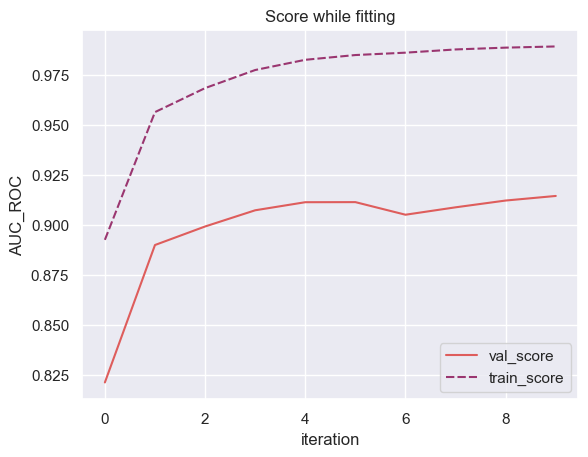

In [79]:
boosting = Boosting(plot= True)

%time boosting.fit(x_train, y_train, x_valid, y_valid) #Дз делал в VS code, не работает штука, которая время измеряет, учится примерно 3 сек.

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators


assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

In [80]:
boosting.predict_proba(x_test)

array([[0.38989953, 0.61010047],
       [0.61010047, 0.38989953],
       [0.38885395, 0.61114605],
       ...,
       [0.38989953, 0.61010047],
       [0.38989953, 0.61010047],
       [0.52763116, 0.47236884]])

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

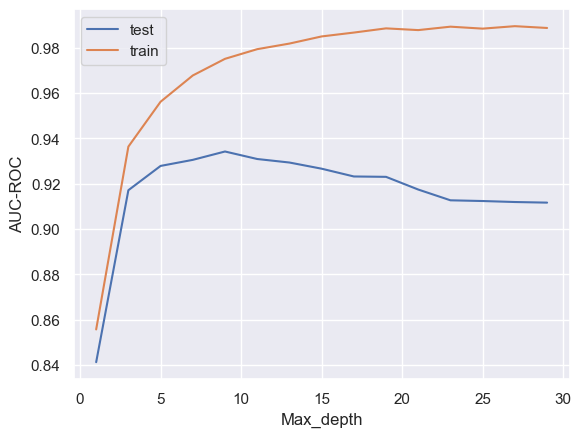

In [81]:
results = {'train': [],
           'test': []}

depths = range(1, 30, 2)
for depth in depths:
    model = Boosting(base_model_params={'max_depth': depth})
    model.fit(x_train, y_train, x_valid, y_valid)
    results['train'].append(model.score(x_train, y_train))
    results['test'].append(model.score(x_test, y_test))

plt.plot(depths, results['test'], label = 'test')
plt.title('')
plt.plot(depths, results['train'], label = 'train')
plt.xlabel('Max_depth')
plt.ylabel('AUC-ROC')
plt.legend()
plt.show()


# YOUR CODE:

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

`### ваше решение тут ###`
Наилучшее качество имеет модель с глубиной базовой модели, равной 9. Ну наверное это наиболее сбалансированная глубина, которая ещё не допускает переобучения, но в то же время достаточно сложна и глубока, чтобы хорошо учитывать значения признаков.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [82]:
# YOUR CODE:
import optuna
def objective(trial):
    # Определяем параметры для подбора
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    early_stop = trial.suggest_int('early_stopping_rounds', 20, 100)

    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    min_weight_fraction_leaf = trial.suggest_uniform('min_weight_fraction_leaf', 0, 0.5)
    max_features = trial.suggest_uniform('max_features', 0.001, 1)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 1000)
    min_impurity_decrease = trial.suggest_loguniform('min_impurity_decrease', 0.0000000001, 20)

    # Инициализируем модель
    model = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=early_stop,
        base_model_params={'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
                            'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features,
                            'max_leaf_nodes': max_leaf_nodes, 'min_impurity_decrease': min_impurity_decrease})

    # Обучаем и считаем качество
    model.fit(x_train, y_train, x_valid, y_valid)

    score = model.score(x_valid, y_valid)

    return score
#Запускаем приколы
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100, n_jobs=-1)

#Выносим лучшие параметры
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-12-24 18:40:27,130] A new study created in memory with name: no-name-8e7ab32a-279b-4c4f-8990-8d02a5455c89
[I 2023-12-24 18:40:30,645] Trial 7 finished with value: 0.8281698358839527 and parameters: {'n_estimators': 11, 'learning_rate': 0.006442434893099269, 'subsample': 0.8258022404165473, 'early_stopping_rounds': 33, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.36698288447888244, 'max_features': 0.37374853111140893, 'max_leaf_nodes': 326, 'min_impurity_decrease': 1.7120669756327515e-07}. Best is trial 7 with value: 0.8281698358839527.
[I 2023-12-24 18:40:43,724] Trial 8 finished with value: 0.8791818223178988 and parameters: {'n_estimators': 42, 'learning_rate': 0.046309437546019454, 'subsample': 0.7168190731497784, 'early_stopping_rounds': 70, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.44485689795791655, 'max_features': 0.9516578404571726, 'max_leaf_nodes': 945, 'min_impurity

Best Hyperparameters: {'n_estimators': 76, 'learning_rate': 0.06839180366692196, 'subsample': 0.8214907255011592, 'early_stopping_rounds': 20, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.0035283895634954285, 'max_features': 0.5504402528877962, 'max_leaf_nodes': 454, 'min_impurity_decrease': 6.607579584159008e-05}


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

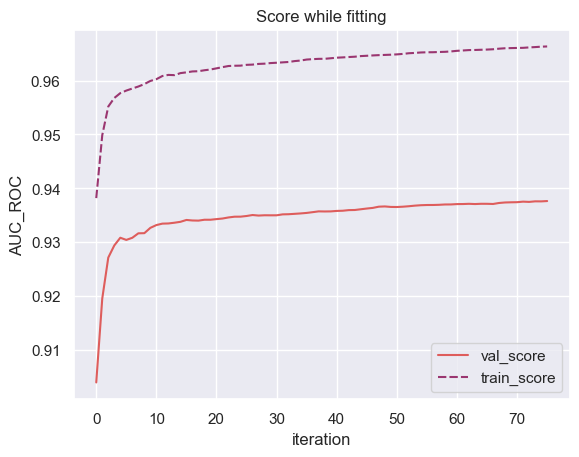

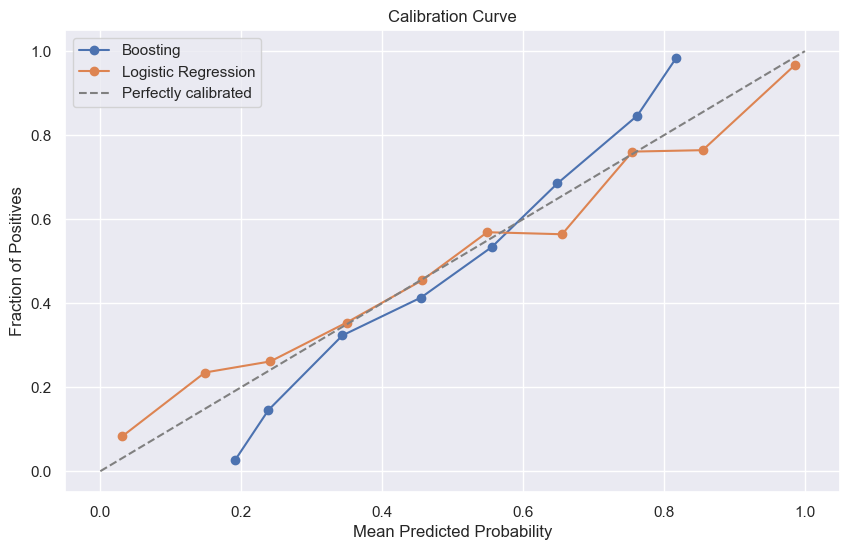

In [90]:
# YOUR CODE:

from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
best_boost = Boosting(plot = True,
        n_estimators=best_params['n_estimators'],
        learning_rate= best_params['learning_rate'],
        subsample= best_params['subsample'],
        early_stopping_rounds= best_params['early_stopping_rounds'],
        base_model_params={'max_depth': best_params['max_depth'], 'min_samples_split': best_params['min_samples_split'],
                            'min_samples_leaf': best_params['min_samples_leaf'],
                            'min_weight_fraction_leaf': best_params['min_weight_fraction_leaf'], 'max_features': best_params['max_features'],
                            'max_leaf_nodes': best_params['max_leaf_nodes'], 'min_impurity_decrease': best_params['min_impurity_decrease']})

best_boost.fit(x_train, y_train, x_valid, y_valid)

y_proba_boosting = best_boost.predict_proba(x_test)[:, 1]
y_proba_lr = LogReg.predict_proba(x_test)[:, 1]

prob_true_boosting, prob_pred_boosting = calibration_curve(y_test, y_proba_boosting, n_bins=10, strategy='uniform')
prob_true_lr, prob_pred_lr = calibration_curve(y_test, y_proba_lr, n_bins=10, strategy='uniform')


plt.figure(figsize=(10, 6))
plt.plot(prob_pred_boosting, prob_true_boosting, marker='o', label='Boosting')
plt.plot(prob_pred_lr, prob_true_lr, marker='o', label='Logistic Regression')

# Добавил диагональ - идельные вероятности
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()

plt.show()


In [91]:
best_boost.score(x_test, y_test)

0.9358454976437636

В целом бустинг неплохо оценивает вероятности, однако низкие вероятности он переоценивает, а более высокие - недооценивает. С Логистической регрессией наоборот, практически все вероятности она недооценивает, а переоценивает лишь очень высокие вероятности. 

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [92]:
best_boost.feature_importances_.sum()

1.0000000000000002

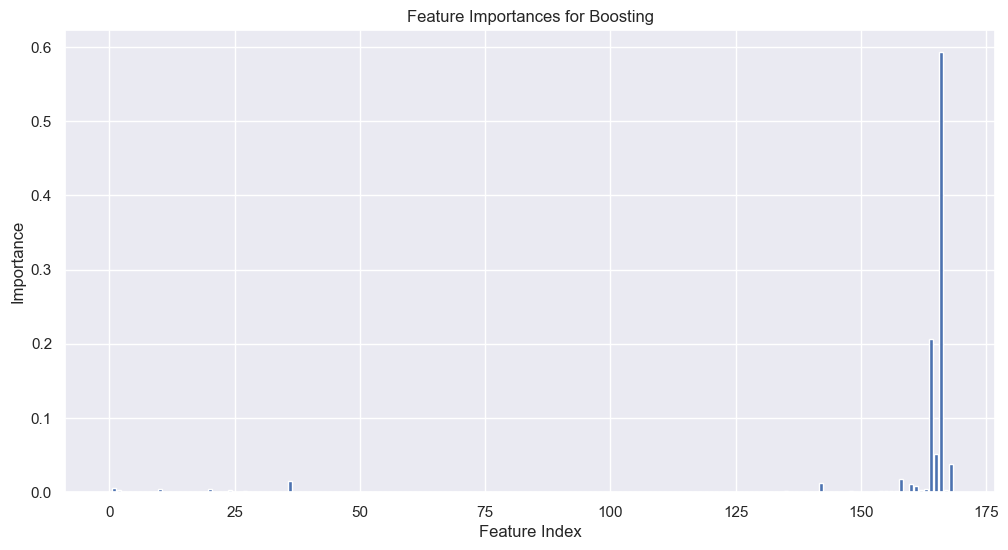

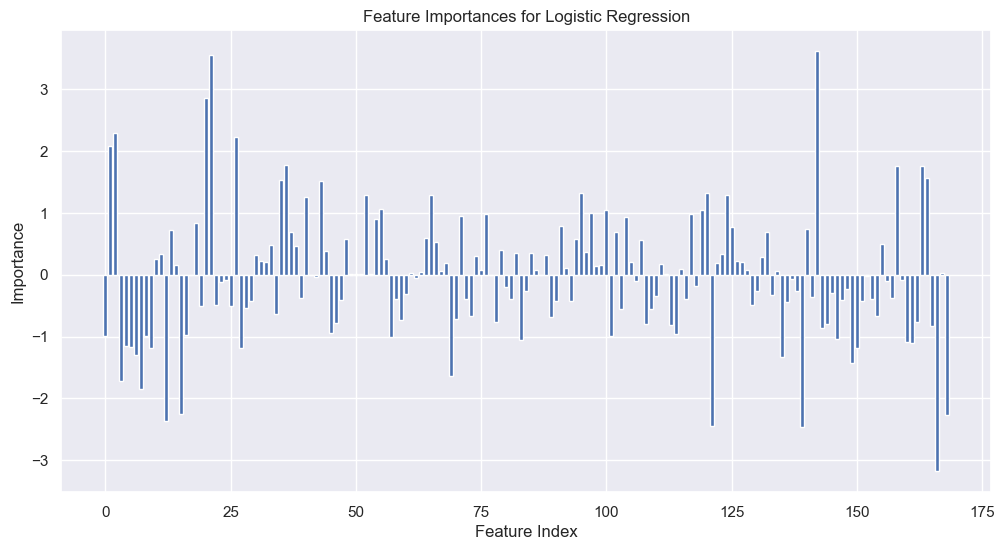

In [93]:
# YOUR CODE:
plt.figure(figsize=(12, 6))
plt.bar(range(len(best_boost.feature_importances_)), best_boost.feature_importances_)
plt.title('Feature Importances for Boosting')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Для логистической регрессии
plt.figure(figsize=(12, 6))
plt.bar(range(len(LogReg.coef_[0])), LogReg.coef_[0])
plt.title('Feature Importances for Logistic Regression')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

Видим овермного лишних признаков, у которых очень низкие важности.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [94]:
# YOUR CODE:

idx = best_boost.feature_importances_.argsort()
idx = idx[::-1]
#Взял первые 35 признаков по фану
idx = idx[:35]



0.936163939898256

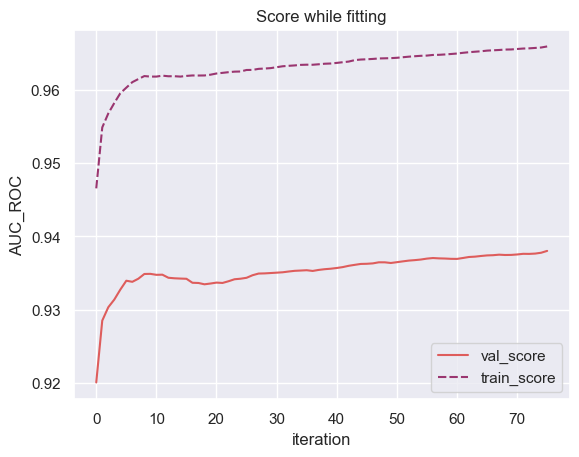

In [95]:
best_boost = Boosting(plot = True,
        n_estimators=best_params['n_estimators'],
        learning_rate= best_params['learning_rate'],
        subsample= best_params['subsample'],
        early_stopping_rounds= best_params['early_stopping_rounds'],
        base_model_params={'max_depth': best_params['max_depth'], 'min_samples_split': best_params['min_samples_split'],
                            'min_samples_leaf': best_params['min_samples_leaf'],
                            'min_weight_fraction_leaf': best_params['min_weight_fraction_leaf'], 'max_features': best_params['max_features'],
                            'max_leaf_nodes': best_params['max_leaf_nodes'], 'min_impurity_decrease': best_params['min_impurity_decrease']})

best_boost.fit(x_train[:, idx], y_train, x_valid[:, idx], y_valid)
best_boost.score(x_test[:, idx], y_test)

Качество выросло на тестовой выборке, значит модель и правда стала лучше.

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
# YOUR CODE:

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [98]:
# YOUR CODE:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
model = CatBoostClassifier()

model.fit(x_train, y_train)
probs = model.predict_proba(x_test)[:, 1]
print(roc_auc_score(y_test, probs))

Learning rate set to 0.036078
0:	learn: 0.6491461	total: 159ms	remaining: 2m 38s
1:	learn: 0.6106101	total: 178ms	remaining: 1m 28s
2:	learn: 0.5804629	total: 198ms	remaining: 1m 5s
3:	learn: 0.5522560	total: 220ms	remaining: 54.8s
4:	learn: 0.5262195	total: 240ms	remaining: 47.7s
5:	learn: 0.5008076	total: 257ms	remaining: 42.7s
6:	learn: 0.4812964	total: 276ms	remaining: 39.2s
7:	learn: 0.4620364	total: 297ms	remaining: 36.8s
8:	learn: 0.4461814	total: 318ms	remaining: 35s
9:	learn: 0.4303349	total: 340ms	remaining: 33.6s
10:	learn: 0.4142073	total: 358ms	remaining: 32.2s
11:	learn: 0.4011999	total: 377ms	remaining: 31.1s
12:	learn: 0.3907486	total: 395ms	remaining: 30s
13:	learn: 0.3808040	total: 414ms	remaining: 29.2s
14:	learn: 0.3710193	total: 434ms	remaining: 28.5s
15:	learn: 0.3641415	total: 452ms	remaining: 27.8s
16:	learn: 0.3554514	total: 468ms	remaining: 27.1s
17:	learn: 0.3492319	total: 484ms	remaining: 26.4s
18:	learn: 0.3419545	total: 499ms	remaining: 25.8s
19:	learn: 0.

In [99]:
roc_auc_score(y_test, probs) - best_boost.score(x_test[:, idx], y_test)

0.005457997899619427

Ну блин, катбуст из коробки уничтожил мою модель, но вообще это одно из преимуществ катбуста, я смотрел презентацию, там об этом говорили.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

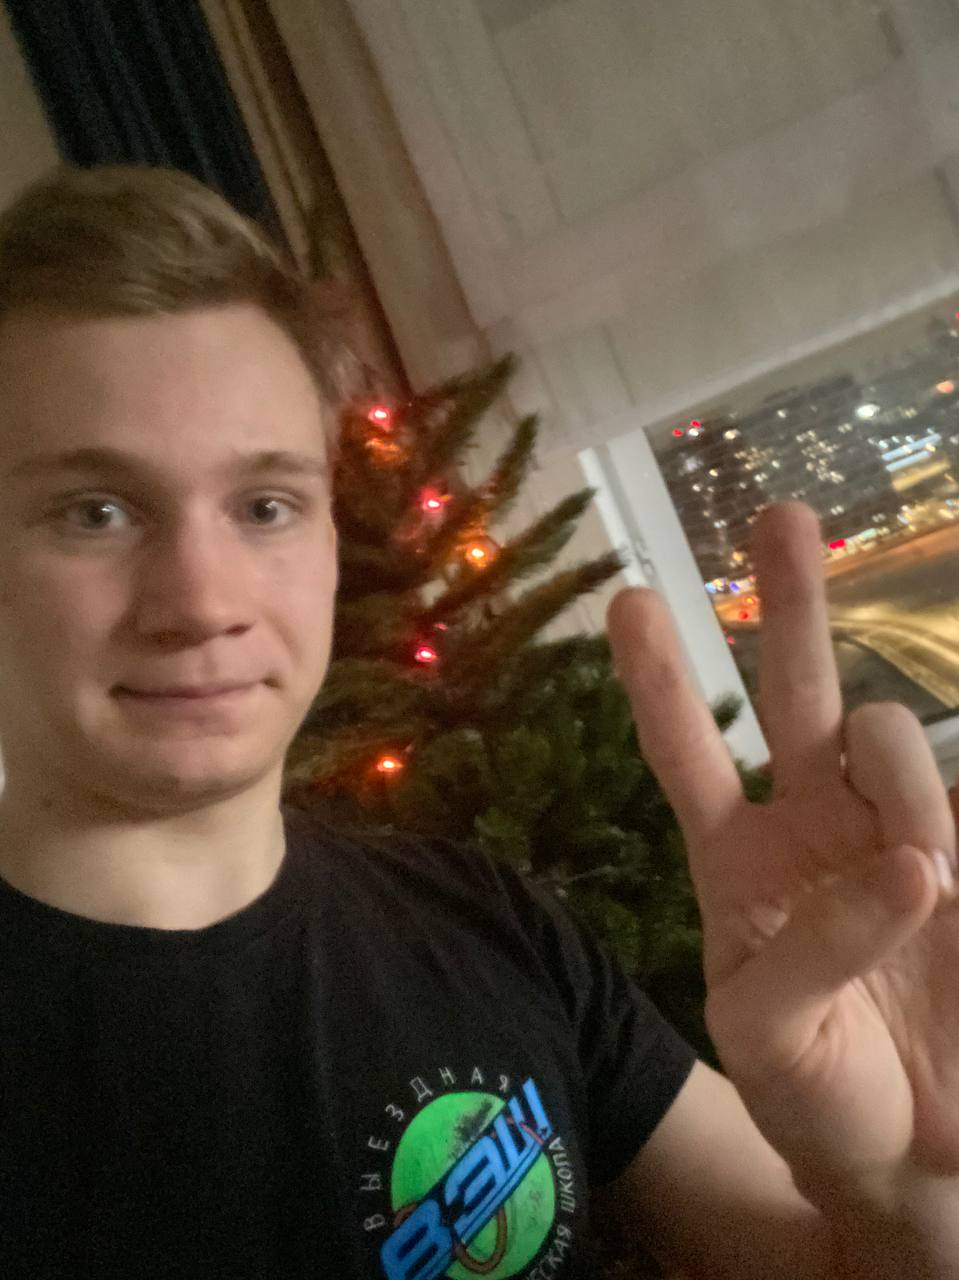

Я не МООООООООООП(((((, в 24 году хочу понять, куда идут экономисты, если не в цб. Хочется хапнуть корпоративности и начать делать много мани Спасибо огромное за данный курс!!!!